In [1]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *

In [2]:
path = Path('data/')

In [3]:
fnames = L()
fnames_train = get_image_files(path/'train') #L()
fnames_valid = get_image_files(path/'val') #L()
fnames = fnames_train + fnames_valid
lbl_names = get_image_files(path/'labels')

In [4]:
fnames_train

(#7949) [Path('data/train/images/048724.jpg'),Path('data/train/images/041315.jpg'),Path('data/train/images/070306.jpg'),Path('data/train/images/068486.jpg'),Path('data/train/images/041102.jpg'),Path('data/train/images/031315.jpg'),Path('data/train/images/038170.jpg'),Path('data/train/images/008149.jpg'),Path('data/train/images/024138.jpg'),Path('data/train/images/071438.jpg')...]

In [5]:
fnames_valid

(#418) [Path('data/val/images/030088.jpg'),Path('data/val/images/029158.jpg'),Path('data/val/images/073484.jpg'),Path('data/val/images/052676.jpg'),Path('data/val/images/019209.jpg'),Path('data/val/images/017997.jpg'),Path('data/val/images/025141.jpg'),Path('data/val/images/070529.jpg'),Path('data/val/images/025022.jpg'),Path('data/val/images/033000.jpg')...]

In [6]:
fnames

(#8367) [Path('data/train/images/048724.jpg'),Path('data/train/images/041315.jpg'),Path('data/train/images/070306.jpg'),Path('data/train/images/068486.jpg'),Path('data/train/images/041102.jpg'),Path('data/train/images/031315.jpg'),Path('data/train/images/038170.jpg'),Path('data/train/images/008149.jpg'),Path('data/train/images/024138.jpg'),Path('data/train/images/071438.jpg')...]

In [7]:
fnames[-3:]

(#3) [Path('data/val/images/011568.jpg'),Path('data/val/images/057021.jpg'),Path('data/val/images/049608.jpg')]

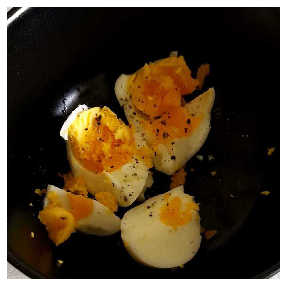

In [8]:
img_fn = fnames[10]
img = PILImage.create(img_fn)
img.show(figsize=(5,5))

In [9]:
get_msk = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}'

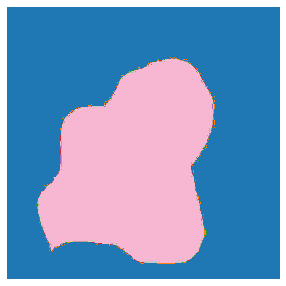

In [10]:
msk = PILMask.create(get_msk(img_fn))
msk.show(figsize=(5,5), alpha=1)

In [11]:
tensor(msk)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [12]:
tensor(msk).shape

torch.Size([830, 831])

In [13]:
codes = np.loadtxt('codes.txt', dtype=str); codes

array(['void', 'water', 'pizza-margherita-baked', 'broccoli',
       'salad-leaf-salad-green', 'zucchini', 'egg', 'butter',
       'bread-white', 'apple', 'dark-chocolate',
       'white-coffee-with-caffeine', 'sweet-pepper',
       'mixed-salad-chopped-without-sauce', 'tomato-sauce',
       'bread-wholemeal', 'coffee-with-caffeine', 'cucumber', 'cheese',
       'pasta-spaghetti', 'rice', 'salmon', 'carrot', 'onion',
       'mixed-vegetables', 'espresso-with-caffeine', 'banana',
       'strawberries', 'mayonnaise', 'almonds', 'wine-white',
       'hard-cheese', 'ham-raw', 'tomato', 'french-beans', 'mandarine',
       'wine-red', 'potatoes-steamed', 'croissant', 'salami',
       'boisson-au-glucose-50g', 'biscuits', 'corn', 'leaf-spinach',
       'jam', 'tea-green', 'chips-french-fries', 'parmesan', 'beer',
       'avocado', 'bread-french-white-flour', 'chicken', 'soft-cheese',
       'tea', 'sauce-savoury', 'honey', 'bread-whole-wheat',
       'bread-sourdough', 'gruyere', 'pickle', 'm

In [14]:
food = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=GrandparentSplitter(train_name='train', valid_name='val'),
                   get_y=get_msk,
                   item_tfms=CropPad(size=448, pad_mode='reflection'),
                   batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])

In [15]:
dls = food.dataloaders(path, bs=8)

In [16]:
dls.one_batch()[0].shape

torch.Size([8, 3, 448, 448])

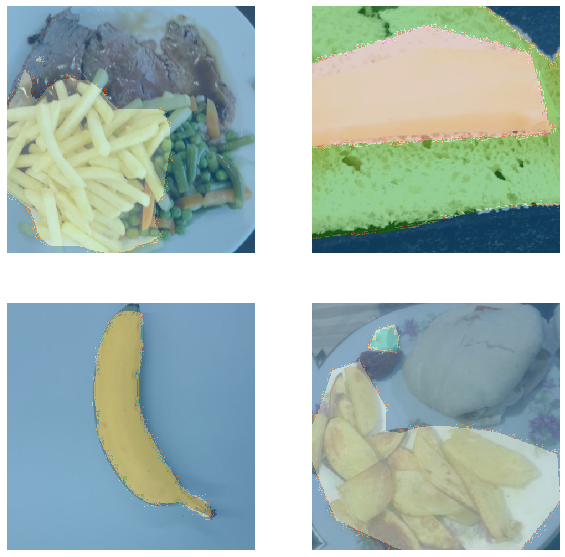

In [17]:
dls.show_batch(max_n=4, vmin=1, vmax=30, figsize=(10,10))

In [18]:
dls.vocab = codes

In [22]:
name2id = {v:k for k,v in enumerate(codes)}

In [23]:
name2id

{'void': 0,
 'water': 1,
 'pizza-margherita-baked': 2,
 'broccoli': 3,
 'salad-leaf-salad-green': 4,
 'zucchini': 5,
 'egg': 6,
 'butter': 7,
 'bread-white': 8,
 'apple': 9,
 'dark-chocolate': 10,
 'white-coffee-with-caffeine': 11,
 'sweet-pepper': 12,
 'mixed-salad-chopped-without-sauce': 13,
 'tomato-sauce': 14,
 'bread-wholemeal': 15,
 'coffee-with-caffeine': 16,
 'cucumber': 17,
 'cheese': 18,
 'pasta-spaghetti': 19,
 'rice': 20,
 'salmon': 21,
 'carrot': 22,
 'onion': 23,
 'mixed-vegetables': 24,
 'espresso-with-caffeine': 25,
 'banana': 26,
 'strawberries': 27,
 'mayonnaise': 28,
 'almonds': 29,
 'wine-white': 30,
 'hard-cheese': 31,
 'ham-raw': 32,
 'tomato': 33,
 'french-beans': 34,
 'mandarine': 35,
 'wine-red': 36,
 'potatoes-steamed': 37,
 'croissant': 38,
 'salami': 39,
 'boisson-au-glucose-50g': 40,
 'biscuits': 41,
 'corn': 42,
 'leaf-spinach': 43,
 'jam': 44,
 'tea-green': 45,
 'chips-french-fries': 46,
 'parmesan': 47,
 'beer': 48,
 'avocado': 49,
 'bread-french-white-f

In [24]:
void_code = name2id['void']

In [25]:
def acc_food(inp, targ):
    targ = targ.squeeze(1)
    mask = targ != void_code # 0 is the background -> no food in the mask
    return (inp.argmax(dim=1)[mask]==targ[mask]).float().mean()

In [26]:
config = unet_config(self_attention=True, act_cls=Mish)

In [27]:
opt = ranger

In [28]:
learn = unet_learner(dls, resnet34, metrics=acc_food, config=config,
                     opt_func=opt)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ec2-user/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 28.3MB/s]


In [29]:
learn.summary()

DynamicUnet (Input shape: ['8 x 3 x 448 x 448'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               8 x 64 x 224 x 224   9,408      False     
________________________________________________________________
BatchNorm2d          8 x 64 x 224 x 224   128        True      
________________________________________________________________
ReLU                 8 x 64 x 224 x 224   0          False     
________________________________________________________________
MaxPool2d            8 x 64 x 112 x 112   0          False     
________________________________________________________________
Conv2d               8 x 64 x 112 x 112   36,864     False     
________________________________________________________________
BatchNorm2d          8 x 64 x 112 x 112   128        True      
________________________________________________________________
ReLU                 8 x 64 x 112 x 112   0          False     
_________________________________________________

In [30]:
learn.lr_find()

RuntimeError: CUDA error: device-side assert triggered

In [31]:
!nvidia-smi

Mon Feb 17 11:39:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:1E.0 Off |                    0 |
| N/A   35C    P0    50W / 300W |  14387MiB / 16130MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  